In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
1,2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2,2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
3,2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
4,2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL


In [3]:
df = df.loc[df['Ticker']=='AAPL']
df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
1,2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2,2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
3,2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
4,2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL
...,...,...,...,...,...,...,...,...
1003,2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000,AAPL
1004,2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800,AAPL
1005,2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111380900,AAPL
1006,2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400,AAPL


In [4]:
df = df[["Date", "Close"]]
df

,Date,Close
0,2018-12-03,46.205002
1,2018-12-04,44.172501
2,2018-12-06,43.680000
3,2018-12-07,42.122501
4,2018-12-10,42.400002
...,...,...
1003,2022-11-28,144.220001
1004,2022-11-29,141.169998
1005,2022-11-30,148.029999
1006,2022-12-01,148.309998


In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-10-16')
datetime_object

datetime.datetime(2022, 10, 16, 0, 0)

In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/tmp/ipykernel_196859/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-12-03
1      2018-12-04
2      2018-12-06
3      2018-12-07
4      2018-12-10
          ...    
1003   2022-11-28
1004   2022-11-29
1005   2022-11-30
1006   2022-12-01
1007   2022-12-02
Name: Date, Length: 1008, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2018-12-03,46.205002
2018-12-04,44.172501
2018-12-06,43.680000
2018-12-07,42.122501
2018-12-10,42.400002
...,...
2022-11-28,144.220001
2022-11-29,141.169998
2022-11-30,148.029999


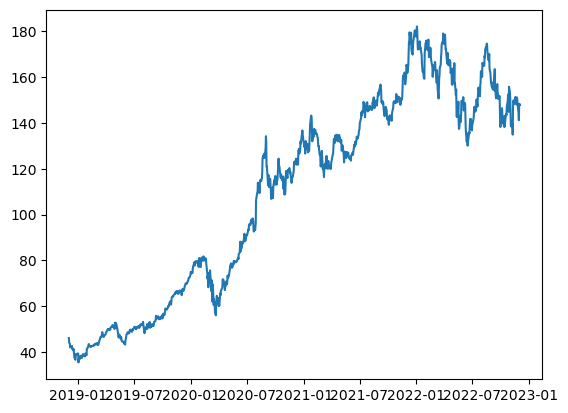

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df


sequential_length = 100
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2019-12-10', 
                                '2022-12-01', 
                                n = sequential_length)
windowed_df

/tmp/ipykernel_196859/2098233423.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Target-{n-i}'] = X[:, i]
/tmp/ipykernel_196859/2098233423.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df['Target'] = Y


,Target Date,Target-100,Target-99,Target-98,Target-97,Target-96,Target-95,Target-94,Target-93,Target-92,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2019-12-10,50.647499,51.805000,52.209999,52.167500,51.755001,51.935001,52.419998,52.195000,53.259998,...,66.072502,66.959999,66.812500,66.040001,64.862503,65.434998,66.394997,67.677498,66.730003,67.120003
1,2019-12-11,51.805000,52.209999,52.167500,51.755001,51.935001,52.419998,52.195000,53.259998,52.107498,...,66.959999,66.812500,66.040001,64.862503,65.434998,66.394997,67.677498,66.730003,67.120003,67.692497
2,2019-12-12,52.209999,52.167500,51.755001,51.935001,52.419998,52.195000,53.259998,52.107498,51.005001,...,66.812500,66.040001,64.862503,65.434998,66.394997,67.677498,66.730003,67.120003,67.692497,67.864998
3,2019-12-13,52.167500,51.755001,51.935001,52.419998,52.195000,53.259998,52.107498,51.005001,48.334999,...,66.040001,64.862503,65.434998,66.394997,67.677498,66.730003,67.120003,67.692497,67.864998,68.787498
4,2019-12-16,51.755001,51.935001,52.419998,52.195000,53.259998,52.107498,51.005001,48.334999,49.250000,...,64.862503,65.434998,66.394997,67.677498,66.730003,67.120003,67.692497,67.864998,68.787498,69.964996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2022-11-25,142.919998,146.350006,147.039993,144.869995,145.860001,145.490005,148.470001,150.169998,147.070007,...,149.699997,148.279999,150.039993,148.789993,150.720001,151.289993,148.009995,150.179993,151.070007,148.110001
747,2022-11-28,146.350006,147.039993,144.869995,145.860001,145.490005,148.470001,150.169998,147.070007,151.000000,...,148.279999,150.039993,148.789993,150.720001,151.289993,148.009995,150.179993,151.070007,148.110001,144.220001
748,2022-11-29,147.039993,144.869995,145.860001,145.490005,148.470001,150.169998,147.070007,151.000000,153.039993,...,150.039993,148.789993,150.720001,151.289993,148.009995,150.179993,151.070007,148.110001,144.220001,141.169998
749,2022-11-30,144.869995,145.860001,145.490005,148.470001,150.169998,147.070007,151.000000,153.039993,155.350006,...,148.789993,150.720001,151.289993,148.009995,150.179993,151.070007,148.110001,144.220001,141.169998,148.029999


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((751,), (751, 100, 1), (751,))

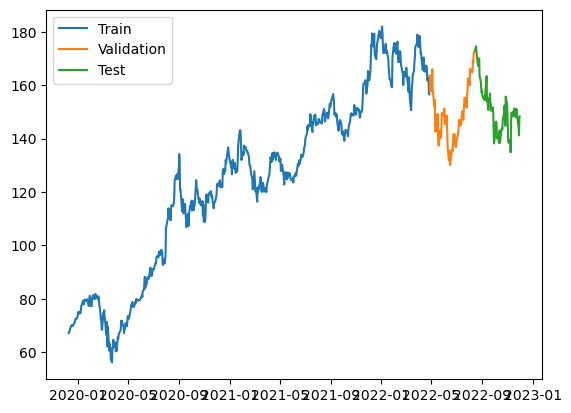

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((sequential_length, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

2023-01-14 19:28:04.311444: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 19:28:04.505930: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-14 19:28:04.505965: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-14 19:28:05.602551: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Epoch 1/200
19/19 [==============================] - 3s 55ms/step - loss: 16184.0283 - mean_absolute_error: 122.8336 - val_loss: 21935.8809 - val_mean_absolute_error: 147.7329
Epoch 2/200
19/19 [==============================] - 1s 31ms/step - loss: 15737.2432 - mean_absolute_error: 121.0063 - val_loss: 21226.3633 - val_mean_absolute_error: 145.3113
Epoch 3/200
19/19 [==============================] - 1s 29ms/step - loss: 14812.6816 - mean_absolute_error: 117.0202 - val_loss: 19561.6973 - val_mean_absolute_error: 139.4573
Epoch 4/200
19/19 [==============================] - 1s 31ms/step - loss: 12070.5244 - mean_absolute_error: 104.2875 - val_loss: 14337.8535 - val_mean_absolute_error: 119.2587
Epoch 5/200
19/19 [==============================] - 1s 30ms/step - loss: 7409.2524 - mean_absolute_error: 78.4813 - val_loss: 7612.9448 - val_mean_absolute_error: 86.6006
Epoch 6/200
19/19 [==============================] - 1s 30ms/step - loss: 3046.3464 - mean_absolute_error: 47.1402 - val_los

19/19 [==============================] - 1s 12ms/step


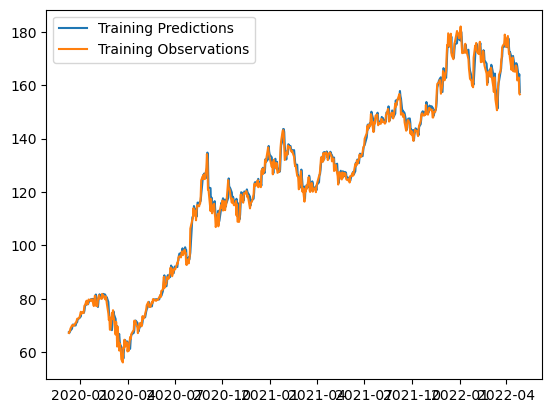

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 [==============================] - 0s 11ms/step


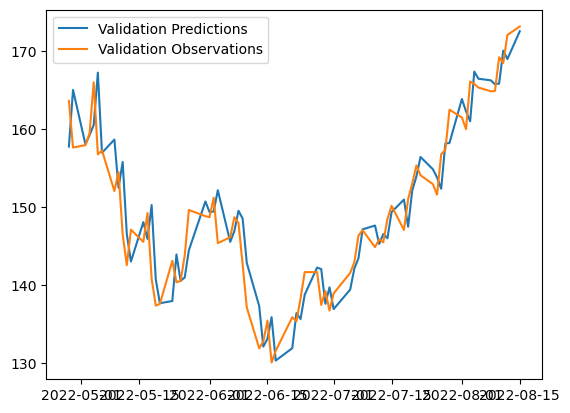

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 13ms/step


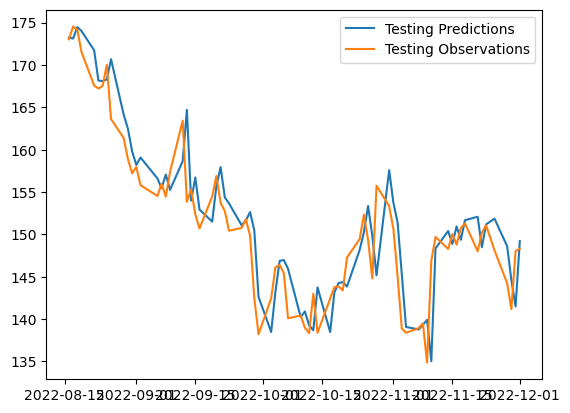

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

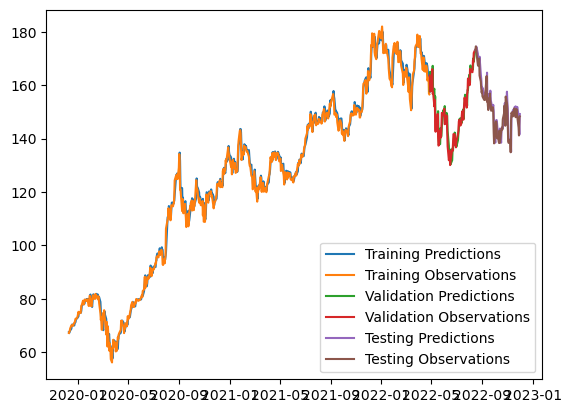

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 22ms/step


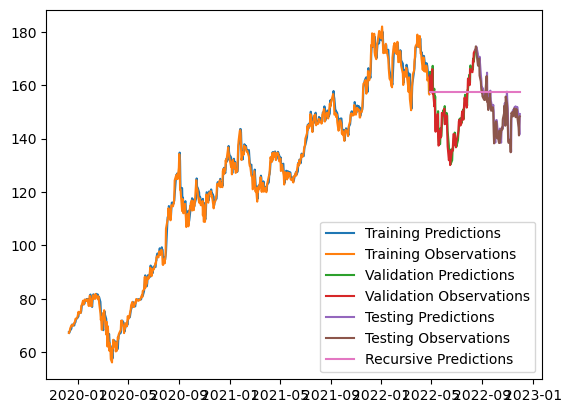

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

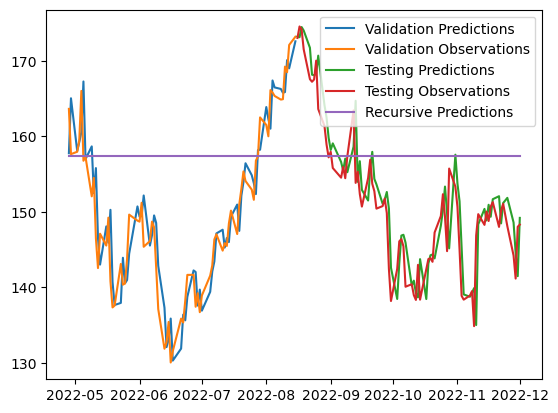

In [19]:
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])